Name: Chasitty Ayala

In [ ]:
!pip install --upgrade tensorflow transformers datasets sacremoses sentencepiece sacrebleu evaluate huggingface_hub -q


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 119.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.0/104.0 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.8/447.8 kB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
#importing required libraries
import os
import sys
#Transformers and NLP libraries
import transformers
import evaluate
import tensorflow as tf
import numpy as np
import re
import json
import seaborn as sns
import pandas as pd
#For data visualization and plotting
import matplotlib.pyplot as plt

#Hugging Face datasets library
from datasets import load_dataset, DatasetDict

#Hugging Face tokenizers and model classes
from transformers import AutoTokenizer
from transformers import TFAutoModelForSeq2SeqLM, DataCollatorForSeq2Seq
from transformers import AdamWeightDecay
from transformers import MarianMTModel, MarianTokenizer
from transformers import Seq2SeqTrainingArguments, Seq2SeqTrainer


https://huggingface.co/Helsinki-NLP


https://huggingface.co/datasets/CohereForAI/aya_collection


In [ ]:
#Loading MarianMT model and tokenizer under model_checkpoint

model_checkpoint = {
    "hi": "Helsinki-NLP/opus-mt-en-hi",   # English to Hindi
    "es": "Helsinki-NLP/opus-mt-en-es",   # English to Spanish
    "fr": "Helsinki-NLP/opus-mt-en-fr",   # English to French
    "ar": "Helsinki-NLP/opus-mt-en-ar",   # English to Arabic
    "pt": "Helsinki-NLP/opus-mt-tc-big-en-pt",   # English to Portuguese
}

#Load the public dataset
raw_datasets = load_dataset("CohereForAI/aya_collection", "aya_dataset")
print(raw_datasets)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/72.3k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/134M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/202364 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['id', 'inputs', 'targets', 'dataset_name', 'sub_dataset_name', 'task_type', 'template_id', 'language', 'split', 'script'],
        num_rows: 202364
    })
})


In [ ]:
#load model and tokenizer
def load_model_token(target_lang):
    model_name = model_checkpoint.get(target_lang)

    if not model_name:
        raise ValueError(f"Model for {target_lang} is not available.")

    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = TFAutoModelForSeq2SeqLM.from_pretrained(model_name)

    return tokenizer, model


#load models for each language pair

tokenizer, model = load_model_token("hi")
tokenizer, model = load_model_token("ar")
tokenizer, model = load_model_token("es")
tokenizer, model = load_model_token("fr")
tokenizer, model = load_model_token("pt")

tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.39k [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/812k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/1.07M [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.10M [00:00<?, ?B/s]

tf_model.h5:   0%|          | 0.00/306M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFMarianMTModel.

All the layers of TFMarianMTModel were initialized from the model checkpoint at Helsinki-NLP/opus-mt-en-hi.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFMarianMTModel for predictions without further training.


generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.39k [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/801k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/917k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.12M [00:00<?, ?B/s]

tf_model.h5:   0%|          | 0.00/308M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFMarianMTModel.

All the layers of TFMarianMTModel were initialized from the model checkpoint at Helsinki-NLP/opus-mt-en-ar.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFMarianMTModel for predictions without further training.


generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.47k [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/826k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.59M [00:00<?, ?B/s]

tf_model.h5:   0%|          | 0.00/313M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFMarianMTModel.

All the layers of TFMarianMTModel were initialized from the model checkpoint at Helsinki-NLP/opus-mt-en-es.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFMarianMTModel for predictions without further training.


generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.42k [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/778k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.34M [00:00<?, ?B/s]

tf_model.h5:   0%|          | 0.00/301M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFMarianMTModel.

All the layers of TFMarianMTModel were initialized from the model checkpoint at Helsinki-NLP/opus-mt-en-fr.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFMarianMTModel for predictions without further training.


generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/337 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/803k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/825k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.38M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.08k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/465M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFMarianMTModel.

Some weights or buffers of the TF 2.0 model TFMarianMTModel were not initialized from the PyTorch model and are newly initialized: ['model.encoder.embed_positions.weight', 'model.decoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
#PreProcessing the dataset (tokenizing the inputs and targets)

def preprocess_function(examples, tokenizer, max_input_length = 256,max_target_length = 256):
    # Using 'inputs' as the source language text and 'targets' as the target language text
    # You can see this from loading raw_datasets['train'][0] from previously
    inputs = examples["inputs"]
    targets = examples["targets"]

    #Tokenizing the inputs (source language)
    model_inputs = tokenizer(inputs, max_length=max_input_length, truncation=True)

    #Tokenizing the targets (target language)
    with tokenizer.as_target_tokenizer():
        labels = tokenizer(targets, max_length=max_target_length, truncation=True)

    model_inputs["labels"] = labels["input_ids"]
    return model_inputs


In [ ]:
#Apply pre-process function to the dataset with the loaded tokenizer
tokenized_datasets = raw_datasets.map(lambda x: preprocess_function(x, tokenizer), batched=True)

#Splitting the dataset into train, validation, and test sets
train_test_split = tokenized_datasets["train"].train_test_split(test_size=0.2)

#validation and test
validation_test_split = train_test_split["test"].train_test_split(test_size=0.5)


#Organize the splits
tokenized_datasets = DatasetDict({
    "train": train_test_split["train"],
    "validation": validation_test_split["train"],
    "test": validation_test_split["test"]
})


Map:   0%|          | 0/202364 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:3953: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


In [ ]:
#Set batch size and learning parameters
batch_size = 16
learning_rate = 5e-5
weight_decay = 0.01
num_train_epochs = 50

#Define data collator
data_collator = DataCollatorForSeq2Seq(tokenizer, model=model, return_tensors="tf")

In [ ]:
#prepare datasets for training

#Train dataset split
train_dataset = model.prepare_tf_dataset(
    tokenized_datasets["train"],
    batch_size=batch_size,
    shuffle=True,
    collate_fn=data_collator,
)

#Validation dataset split
validation_dataset = model.prepare_tf_dataset(
    tokenized_datasets["validation"],
    batch_size=batch_size,
    shuffle=False,
    collate_fn=data_collator,
)
#Test dataset split
test_dataset = model.prepare_tf_dataset(
    tokenized_datasets["test"],
    batch_size=batch_size,
    shuffle=False,
    collate_fn=data_collator,
)



In [ ]:
#Compile the model with the AdamWeightDecay optimizer
optimizer = AdamWeightDecay(learning_rate=learning_rate, weight_decay_rate=weight_decay)
model.compile(optimizer=optimizer)

#Early Stopping Callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

#Train the model with early stopping
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=num_train_epochs,
    callbacks=[early_stopping]
)

#Save the fine-tuned model and tokenizer
model.save_pretrained("fine_tuned_model")
tokenizer.save_pretrained("fine_tuned_model")

print("Model and tokenizer saved successfully.")


Epoch 1/50
10118/10118 [==============================] - 1870s 182ms/step - loss: 2.0997 - val_loss: 1.7811
Epoch 2/50
10118/10118 [==============================] - 1842s 182ms/step - loss: 1.7303 - val_loss: 1.6343
Epoch 3/50
10118/10118 [==============================] - 1839s 182ms/step - loss: 1.5779 - val_loss: 1.5508
Epoch 4/50
10118/10118 [==============================] - 1839s 182ms/step - loss: 1.4712 - val_loss: 1.4969
Epoch 5/50
10118/10118 [==============================] - 1840s 182ms/step - loss: 1.3858 - val_loss: 1.4583
Epoch 6/50
10118/10118 [==============================] - 1839s 182ms/step - loss: 1.3083 - val_loss: 1.4266
Epoch 7/50
10118/10118 [==============================] - 1839s 182ms/step - loss: 1.2433 - val_loss: 1.4062
Epoch 8/50
10118/10118 [==============================] - 1840s 182ms/step - loss: 1.1815 - val_loss: 1.3864
Epoch 9/50
10118/10118 [==============================] - 1842s 182ms/step - loss: 1.1265 - val_loss: 1.3745
Epoch 10/50
10118/1

In [ ]:
def load_fine_tuned_model():
    tokenizer = AutoTokenizer.from_pretrained("fine_tuned_model")
    model = TFAutoModelForSeq2SeqLM.from_pretrained("fine_tuned_model")
    return tokenizer, model

In [ ]:
#Load the BLEU metric
bleu_metric = evaluate.load('bleu')

#Load translation variations from JSON file
with open('translation_variations.json') as f:
    data = json.load(f)

reference_texts = data.get('reference_texts', {})
synonyms = data.get('synonyms', {})
formal_informal = data.get('formal_informal', {})
punctuation_adjustments = data.get('punctuation_adjustments', {})

#Text normalization function (converts to lowercase, standarizing punctuation and removing extra spaces:)
def normalize_text(text):
    text = text.lower()
    #Remove extra spaces
    text = re.sub(r'\s+', ' ', text)
    #Standardize sentence-ending punctuation
    text = re.sub(r'[.!?]', '.', text)
    #Remove commas
    text = re.sub(r',', '', text)
    #normalize quotes
    text = re.sub(r'[“”]', '"', text)
    #remove leading question marks
    text = re.sub(r'¿', '', text)
    return text.strip()

#Synonym handling function
def handle_synonyms(language, generated_text, reference_text):
    if language in synonyms:
        for word, synonym in synonyms[language].items():
            #Replace only if synonym matches reference
            if synonym in reference_text:
                generated_text = re.sub(rf'\b{word}\b', synonym, generated_text)
    return generated_text

#Formal/Informal handling function
def handle_formal_informal(language, generated_text, reference_text):
    if language in formal_informal:
        for informal, formal in formal_informal[language].items():
            #Replace only if formal/informal word exists in the reference text
            if formal in reference_text or informal in reference_text:
                generated_text = re.sub(rf'\b{informal}\b', formal, generated_text)
    return generated_text

#Adjust punctuation based on variations
def adjust_punctuation(language, generated_text):
    if language in punctuation_adjustments:
        for punct, variations in punctuation_adjustments[language].items():
            for variation in variations:
                #Replace standalone or misplaced punctuation using regex
                pattern = rf'(?<!\w){re.escape(variation)}(?!\w)'
                generated_text = re.sub(pattern, punct, generated_text)
    return generated_text


def post_process_translation(language, text, reference_text):

    #Normalize the text
    text = normalize_text(text)

    #Apply synonym replacements
    text = handle_synonyms(language, text, reference_text)

    #Apply formal/informal adjustments
    text = handle_formal_informal(language, text, reference_text)

    #Adjust punctuation
    text = adjust_punctuation(language, text)

    return text

In [ ]:
bleu_score_matrix = []

#Translate and process text
def translate_text(input_text, target_lang):
    #Load model and tokenizer for the specified language
    tokenizer, model = load_model_token(target_lang)

    #Tokenize the input text
    tokenized = tokenizer([input_text], return_tensors='tf')

    #Generate the output text (translation)
    output_tokens = model.generate(**tokenized, max_length=256)

    #Decode the translated output
    translated_text = tokenizer.decode(output_tokens[0], skip_special_tokens=True)
    return translated_text

#Function to evaluate and save translations and BLEU scores
def evaluate_translation(input_text, target_lang, reference_text, file):
    translated_text = translate_text(input_text, target_lang)
    translated_text = post_process_translation(target_lang, translated_text, reference_text)
    reference_text = post_process_translation(target_lang, reference_text, reference_text)

    print(f"Post-Processed Translation in {target_lang.upper()}: {translated_text}\n")
    print(f"Post-Processed Reference in {target_lang.upper()}: {reference_text}\n")

    #BLEU evaluation
    predictions = [translated_text]
    references = [[reference_text]]
    bleu_score = bleu_metric.compute(predictions=predictions, references=references)
    print(f"BLEU Score in {target_lang.upper()}: {bleu_score}\n")

    #Save the translation and BLEU score to a file
    file.write(f"Input: {input_text}\n")
    file.write(f"Translation ({target_lang.upper()}): {translated_text}\n")
    file.write(f"Reference ({target_lang.upper()}): {reference_text}\n")
    file.write(f"BLEU Score: {bleu_score}\n\n")

    return bleu_score['bleu']

#Test translation using fine-tuned model
input_text = input("Enter what you want to translate: ")
target_lang = input("Enter the language you want to translate to (ex: es for Spanish, ar for Arabic, fr for French, hi for Hindi, pt for Portuguese, all for all languages): ")
reference_text = input("Enter the reference text for BLEU evaluation: ")

#Normalize input and reference texts
input_text = normalize_text(input_text)
reference_text = normalize_text(reference_text)

#Open a log file to save translations and BLEU scores
with open("translations_log.txt", "a") as file:
    if target_lang != "all":
        if target_lang in model_checkpoint:
            #Evaluate translation for a single language
            bleu_score = evaluate_translation(input_text, target_lang, reference_text, file)
            bleu_score_matrix.append([bleu_score])
        else:
            print("Language is not available at this time. Please select a different option.")
    else:
        language_scores = []
        for lang in model_checkpoint.keys():
            #Prompt for reference text for each language
            reference_text = input(f"Enter the reference text for BLEU evaluation in {lang.upper()}: ")
            reference_text = normalize_text(reference_text)

            #Evaluate translation for each language
            bleu_score = evaluate_translation(input_text, lang, reference_text, file)
            language_scores.append(bleu_score)

        #Append the scores for all languages in this round to the matrix
        bleu_score_matrix.append(language_scores)


Enter what you want to translate: After months of planning, the team successfully launched the new product, receiving positive feedback from customers around the world.
Enter the language you want to translate to (ex: es for Spanish, ar for Arabic, fr for French, hi for Hindi, pt for Portuguese, all for all languages): pt
Enter the reference text for BLEU evaluation: após meses de planejamento a equipe lançou com sucesso o novo produto recebendo feedback positivo de clientes de todo o mundo.


All PyTorch model weights were used when initializing TFMarianMTModel.

Some weights or buffers of the TF 2.0 model TFMarianMTModel were not initialized from the PyTorch model and are newly initialized: ['model.encoder.embed_positions.weight', 'model.decoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Post-Processed Translation in PT: após meses de planejamento a equipe lançou com sucesso o novo produto recebendo feedback positivo de clientes de todo o mundo.

Post-Processed Reference in PT: após meses de planejamento a equipe lançou com sucesso o novo produto recebendo feedback positivo de clientes de todo o mundo.

BLEU Score in PT: {'bleu': 1.0, 'precisions': [1.0, 1.0, 1.0, 1.0], 'brevity_penalty': 1.0, 'length_ratio': 1.0, 'translation_length': 22, 'reference_length': 22}



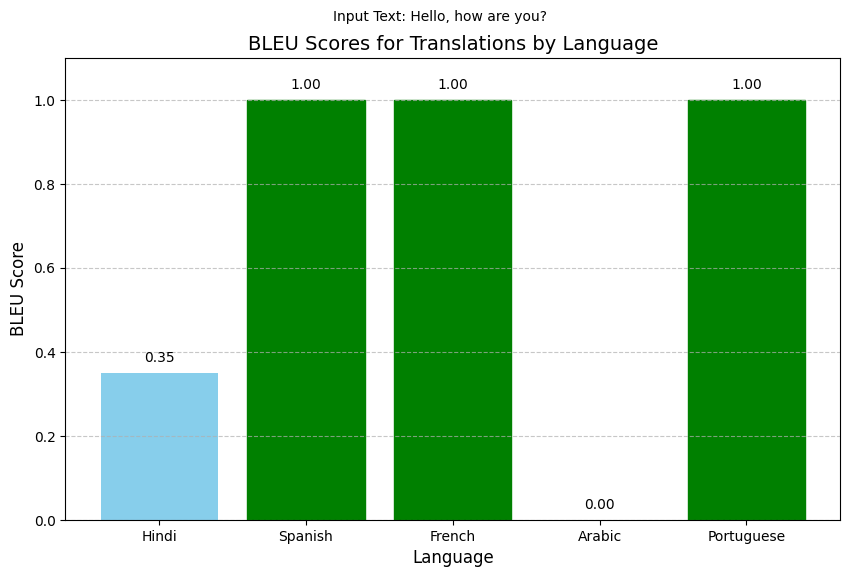

In [ ]:
# Data for visualization
data = {
    "Language": ["Hindi", "Spanish", "French", "Arabic", "Portuguese"],
    "BLEU Score": [0.35, 1.0, 1.0, 0.00, 1.0]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Updated input text for minor title
input_text = "Input Text: Hello, how are you?"

# Visualization with minor title
plt.figure(figsize=(10, 6))
bars = plt.bar(df["Language"], df["BLEU Score"], color="skyblue")

# Highlight the highest BLEU score(s)
max_score = df["BLEU Score"].max()
for bar, score in zip(bars, df["BLEU Score"]):
    if score == max_score:
        bar.set_color("green")

# Add text annotations
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02,
             f"{bar.get_height():.2f}", ha="center", va="bottom")

# Title and labels
plt.title("BLEU Scores for Translations by Language", fontsize=14)
plt.suptitle(input_text, fontsize=10, y=0.96)  # Minor title below the main title
plt.xlabel("Language", fontsize=12)
plt.ylabel("BLEU Score", fontsize=12)
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()